# 특성 선택 Feature Selection
- 머신러닝 모델을 구축할 때 입력 데이터의 특성feature 중에서 중요한 특성만 선택하는 과정
- 모델의 성능을 향상시키고 과적합을 방지하고 계산 비용 줄이는 데 도움
- 불필요한 특성을 제거하면 모델이 더 단순해짐
- 데이터의 잡음을 줄여서 예측 성능이 향상 될 수 있음
## 1. 용어
### 특성 Feature
- 데이터의 개별 속성이나 열
### 특성 선택 Feature Selection
- 모델의 성능을 높이기 위해 중요한 특선만을 선택 과정
### 차원 축소 Dimensionality Reduction
- 데이터의 차원을 줄여서 더 단순한 모델을 만드는 과정
- 예를 들어 PCA ; Principal Component Analysis
## 2. 특성 선택 방법 및 수식
### 1. 필터 방법 Filter Method
- 특성과 타깃 변수 사이의 통계적 속성을 사용하여 특성 선택
- 분산 임계값 Variance Threshold
    - 분산이 낮은 특성 제거

    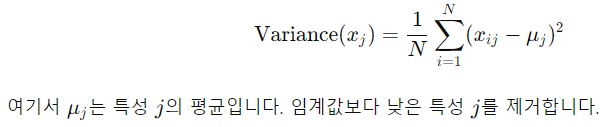


- 상관계수 Correlation Coefficient
    - 타깃 변수와 상관관계가 높은 특성 선택

    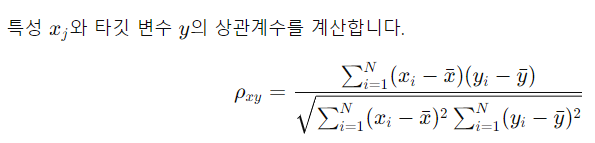

- 카이제곱 검정 Chi-Square Test
    - 분류 문제에서 카이제곱 통계를 사용하여 특성 선택

    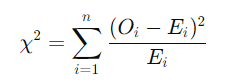
    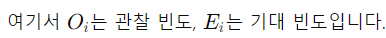

### 2. 랩퍼 방법 Wrapper Method
- 모델 성능을 기준으로 특성 선택
- 전진 선택 Forward Selection
    - 하나식 특성을 추가하면서 성능이 개선되는 특성 선택
- 후진 제거 Backward Elimination
    - 모든 특성으로 시작해서 하나씩 제거하면서 성능이 유지되는 특성 선택
- RFE ; Recursive Feature Elimination
    - 모델을 반복적으로 학습시키면서 중요하지 않은 특성 제거
### 3. 임베디드 방법 Embedded Method
- 모델 학습 과정에서 특성 선택 수행
- L1 정규화 Lasso Regression
    - 가중치가 0이 되는 특성 제거

    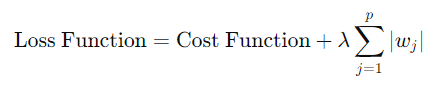

- 트리 기반 방법 Tree-based Methods
    - 트리 모델의 특성 중요도를 사용하여 선택

## 3. 특성 선택의 장점
- 모델의 성능을 향상시킴
- 과적합 방지
- 계산 비용 감축
- 모델의 해석 가능성을 높임

## 4. 특성 선택의 단점
- 모든 데이터에 대해 향상 최적의 특성을 선택하는 것은 어려움
- 특성 선택 과정에서 중요한 정보를 잃을 수 있음
- 특성 선택 방법에 따라 결과가 달라질 수 있음

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine = pd.read_csv('https://bit.ly/wine-date')

# 입력 데이터와 타겟 데이터 분리
X = wine[['alcohol', 'sugar', 'pH']]
y = wine['class']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 특성 선택 (ANOVA F-값을 사용하여 상위 2개의 특성 선택)
# 지정된 k값의 최고 특성을 선택
# f_classif는 분류 문제에 적합한 ANOVA F-검정을 사용하여 각 특성의 중요도를 평가
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

In [5]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [7]:
# 데이터 스케일링
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [8]:
# KNN 모델 훈련 및 평가
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
# 테스트 데이터에 대한 예측
y_pred = knn.predict(X_test_scaled)


# 정확도 평가
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred):.2f}")

KNN Accuracy: 0.81


###  결과 해석
- 테스트 데이터의 81%를 정확하게 분류했다는 의미

# 특성 엔지니어링 Feature Engineering
- 모델의 성능을 향상시키기 위해 원본 데이터에서 새로운 특성feature을 생성하거나 기존의 특성을 변형하는 작업
- 특성 선태과 함께 모델이 예측력을 높이는 데 매우 중요한 과정
- 모델이 더 나은 성능을 발휘할 수 있도록 데이터를 더 유의미하게 만드는 것
## 1. 특성 엔지니어링의 방법
### 1. 특성 변환 Transformation
- 정규화 Normalization
    - 특성 값의 범위를 일정하게 맞추는 방법
    - 보통 0과 1 사이로 값을 조정
    
    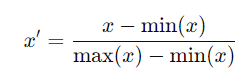

- 표준화 Standardization
    - 특성 값의 평균을 0, 표준 편차를 1로 맞추는 방법

    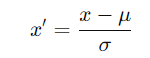

    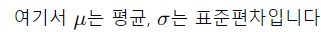

### 2. 특성 생성 Feature Generation
- 다항 특성 Polynomial Features
    - 기존 특성의 다항식을 생성하여 새로운 특성을 만드는 방법
    - 예를 들어, 각 특성의 제곱 값, 내적 값 등의 특성 추가
- 상호작용 항 Interaction Terms
    - 두 개 이상의 특성을 곱하거나 나누어 새로운 특성을 만드는 방법
- 로그 변환 Log Transformation
    - 특성 값의 로그를 취하여 분포를 정규화하거나 왜곡된 분포를 개선하는 방법
- 이진화 Binarization
    - 연속형 변수를 이진형으로 변환하는 방법
### 3. 결측치 처리 Missing Value Handing
- 평균 Mean / 중앙값 Median / 최빈값 Mode Imputation
    - 결측치를 행당 열의 평균, 중앙값, 최빈값 중 하나로 대체하는 방법
- 예측 모델 기반 대체 Model-Based Imputation
    - 결측치를 예측 모델을 사용하여 대체하는 방법
### 4. 차원 축소 Dimenstionality Reduction
- 주성분 분석 PCA ; Principal Component Analysis
    - 데이터의 분산을 최대화하는 방향으로 축을 회전시켜 주요 특성만 선택하는 방법
- 선형 판별 분석 LDA ; Linear Discriminant Analysis
    - 클래스 간의 분산을 최대화하는 방향으로 축을 회전시켜 주요 특성만을 선택하는 방법

In [9]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [10]:
# 다항 특성 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [11]:
# 모델 훈련 및 예측
model = LogisticRegression(max_iter=10000)
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

In [12]:
# 정확도 평가
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Logistic Regression Accuracy: 0.79


### 순차 특성 선택 중 전진 선택법을 이용한 특성 선택

In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [15]:
# 입력 데이터와 타겟 데이터 분리
X = wine.drop(columns=['class'])  # 'class' 열을 제외한 모든 특성
y = wine['class']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# 모델 정의
model = LogisticRegression(max_iter=10000)

# Sequential Feature Selector (전진 선택법)
sfs = SFS(model,
          # 최적의 특성 개수 자동 선택
          k_features='best', 
          # 전진 선택법
          forward=True,  
          # 플로팅 비활성화     
          floating=False, 
          # 성능 평가 기준    
          scoring='accuracy', 
          # 5-겹 교차 검증
          cv=5)              

# Sequential Feature Selector를 사용한 특성 선택
sfs = sfs.fit(X_train_scaled, y_train)

c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\U

In [17]:
# 선택된 특성 확인
selected_features = sfs.k_feature_names_
print(f"Selected features: {selected_features}")

Selected features: ('0', '1', '2')


In [18]:
# 선택된 특성으로 데이터 변환
X_train_sfs = sfs.transform(X_train_scaled)
X_test_sfs = sfs.transform(X_test_scaled)

In [19]:
# 모델 학습 및 평가
model.fit(X_train_sfs, y_train)
y_pred = model.predict(X_test_sfs)
print(f"Logistic Regression Accuracy with selected features: {accuracy_score(y_test, y_pred):.2f}")

Logistic Regression Accuracy with selected features: 0.78
